In [1]:
#Import Libraries
import numpy as np
import pandas as pd

#To avoid warnnings 
import warnings
warnings.filterwarnings('ignore')

#To display all the columns
pd.set_option('Display.max_columns',None)

In [2]:
#Load Data
match = pd.read_csv('matches.csv')

#To display first 5 records
match.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# shape of Data
match.shape
print('Number of Rows : ',match.shape[0])
print('Number of Columns : ',match.shape[1])

Number of Rows :  756
Number of Columns :  18


In [4]:
# Load Data
delivers = pd.read_csv('Deliveries_.csv')

##To display first 5 records
delivers.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# shape of Data
delivers.shape
print('Number of Rows : ',delivers.shape[0])
print('Number of Columns : ',delivers.shape[1])

Number of Rows :  179078
Number of Columns :  21


- Here i am predicting the winning probability after completing the 1 st inning. show i listed some feature that affect own the match reasult.
- Features
  - batting team
  - bollwing team
  - city
  - runs left
  - balls left
  - total runs
  - wickets
  - required run rate (rrr)
  -  curent run ret (crr)
  -  result

- we need to extract that features from the available Data   

# Extracting Features

- we need total runs made by team in every inning of each match. so we need to group by the data by match & inning 

In [6]:
delivers.groupby(['match_id','inning'])['total_runs'].sum()

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [7]:
total_runs  = delivers.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
total_runs

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


- we required only 1st inning score so we extract only 1st inning score 

In [8]:
total_runs = total_runs[total_runs['inning'] == 1]
total_runs

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
#merge the dataframe
match_df = match.merge(total_runs[['match_id','total_runs']], left_on = 'id',right_on = 'match_id') 
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [10]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

- 'Gujarat Lions','Rising Pune Supergiant','Kochi Tuskers Kerala','Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants' this teams are currently not playing ipl so we remove those teams.
- 'Deccan Chargers' is now playing as 'Sunrisers Hyderabad'so we replace 'Deccan Chargers' with 'Sunrisers Hyderabad' and in same way 'Delhi Daredevils' with 'Delhi Capitals'

In [11]:
teams = ['Sunrisers Hyderabad', 
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals']

In [12]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [13]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [14]:
match_df.shape

(641, 20)

- To train model only those matche data is valuable which have result, in the matches there is a rain an dl(duckvers luies)       applied which is not help full so we remove that matches in which dl applied

In [15]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

- Here you can see that there are 15 matches were dl applied so we remove that matches

In [16]:
match_df = match_df[match_df['dl_applied'] == 0]

In [17]:
match.shape

(756, 18)

In [18]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [19]:
match_df = match_df[['match_id','city','winner','total_runs']]

# Runs left

In [20]:
delivers_df = match_df.merge(delivers,on='match_id')

In [21]:
delivers_df = delivers_df[delivers_df['inning'] == 2]

In [22]:
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [23]:
delivers_df.groupby('match_id')['total_runs_y'].cumsum()

125         1
126         1
127         1
128         3
129         7
         ... 
149573    152
149574    154
149575    155
149576    157
149577    157
Name: total_runs_y, Length: 72413, dtype: int64

In [24]:
delivers_df['current_runs'] = delivers_df.groupby('match_id')['total_runs_y'].cumsum()

In [25]:
delivers_df['runs_left'] = delivers_df['total_runs_x'] - delivers_df['current_runs']

In [26]:
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,200


# Balls left

In [27]:
126 - (delivers_df['over']*6 + delivers_df['ball'])

125       119
126       118
127       117
128       116
129       115
         ... 
149573      4
149574      3
149575      2
149576      1
149577      0
Length: 72413, dtype: int64

In [28]:
delivers_df['balls_left'] = 126 - (delivers_df['over']*6 + delivers_df['ball'])

In [29]:
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,200,115


# wickets left

- we can find wicket left by player_dismissed,in this column there is NAN if player is notout other wise there is a name of       that player if he is out on that ball\
- so now we rplace NaN with 0 and player name with 1 

In [30]:
delivers_df['player_dismissed'].isna().sum()

68860

In [31]:
delivers_df['player_dismissed'].value_counts()

G Gambhir        65
RG Sharma        63
RV Uthappa       63
V Kohli          62
SK Raina         55
                 ..
SJ Srivastava     1
J Theron          1
S Ladda           1
DP Nannes         1
M Ur Rahman       1
Name: player_dismissed, Length: 411, dtype: int64

In [32]:
# filling null values with 0
delivers_df['player_dismissed'] = delivers_df['player_dismissed'].fillna('0')

In [33]:
# applying lambad function
delivers_df['player_dismissed'] = delivers_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')

# change data type object to int
delivers_df['player_dismissed'] =  delivers_df['player_dismissed'].astype('int')

In [34]:
wickets = delivers_df.groupby('match_id').cumsum()['player_dismissed'].values

In [35]:
delivers_df['wickets'] = 10 - wickets
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,200,115,10


In [36]:
delivers_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,1,lbw,NaN,157,-5,0,3


# current run rate

In [37]:
# crr = run/over

In [38]:
delivers_df['current_runs']/((120 - delivers_df['balls_left'])/6)

125       6.000000
126       3.000000
127       2.000000
128       4.500000
129       8.400000
            ...   
149573    7.862069
149574    7.897436
149575    7.881356
149576    7.915966
149577    7.850000
Length: 72413, dtype: float64

In [39]:
delivers_df['crr'] = delivers_df['current_runs']/((120 - delivers_df['balls_left'])/6)

In [40]:
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,206,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,204,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,200,115,10,8.4


# Required run rate

In [41]:
delivers_df['runs_left'] / (delivers_df['balls_left']/6)

125       10.386555
126       10.474576
127       10.564103
128       10.551724
129       10.434783
            ...    
149573     0.000000
149574    -4.000000
149575    -9.000000
149576   -30.000000
149577         -inf
Length: 72413, dtype: float64

In [42]:
delivers_df['rrr'] = delivers_df['runs_left'] / (delivers_df['balls_left']/6)

In [43]:
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


# Result

In [44]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0 

In [45]:
delivers_df.apply(result,axis = 1)

125       0
126       0
127       0
128       0
129       0
         ..
149573    0
149574    0
149575    0
149576    0
149577    0
Length: 72413, dtype: int64

In [46]:
delivers_df['result'] = delivers_df.apply(result,axis = 1)

In [47]:
delivers_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,118,10,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,206,117,10,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,204,116,10,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,200,115,10,8.4,10.434783,0


In [48]:
final_df = delivers_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [49]:
 final_df = final_df.sample(final_df.shape[0])

In [50]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
92968,Royal Challengers Bangalore,Mumbai Indians,Mumbai,81,56,8,187,9.9375,8.678571,0


In [51]:
final_df.dropna(inplace = True)

In [52]:
final_df = final_df[final_df['balls_left'] != 0]

In [69]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
130866,Sunrisers Hyderabad,Delhi Daredevils,Delhi,131,78,9,190,8.428571,10.076923,1
106255,Sunrisers Hyderabad,Mumbai Indians,Mumbai,140,103,10,157,6.000000,8.155340,0
62760,Delhi Daredevils,Deccan Chargers,Hyderabad,91,66,9,187,10.666667,8.272727,1
149321,Chennai Super Kings,Delhi Capitals,Visakhapatnam,8,14,7,155,8.320755,3.428571,1
141277,Chennai Super Kings,Rajasthan Royals,Jaipur,90,48,6,158,5.666667,11.250000,1
...,...,...,...,...,...,...,...,...,...,...
45116,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,114,103,9,130,5.647059,6.640777,1
26643,Delhi Daredevils,Kolkata Knight Riders,Durban,148,111,10,154,4.000000,8.000000,1
34725,Delhi Daredevils,Rajasthan Royals,Ahmedabad,97,95,8,141,10.560000,6.126316,1
76665,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,9,9,5,123,6.162162,6.000000,1


# Data splitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

- There are 3 categorial columns so we need to do one-hot encoding on that

# One Hot Encoding

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

In [56]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


# Data Tranning

In [57]:
import sklearn

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [59]:
#creating pipeline
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [60]:
# Model fitting
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

# Model evaluation 

In [61]:
y_pred = pipe.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8011773775317121

In [63]:
pipe.predict_proba(X_test)[10]

array([0.11080496, 0.88919504])

# Match Summary

In [64]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [65]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [66]:
temp_df,target = match_progression(delivers_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,57.4,42.6
10467,2,8,0,51.9,48.1
10473,3,1,0,59.0,41.0
10479,4,7,1,70.4,29.6
10485,5,12,0,60.4,39.6
10491,6,13,0,48.0,52.0
10497,7,9,0,42.1,57.9
10505,8,15,0,28.1,71.9
10511,9,7,0,26.0,74.0
10518,10,17,0,14.2,85.8


Text(0.5, 1.0, 'Target-178')

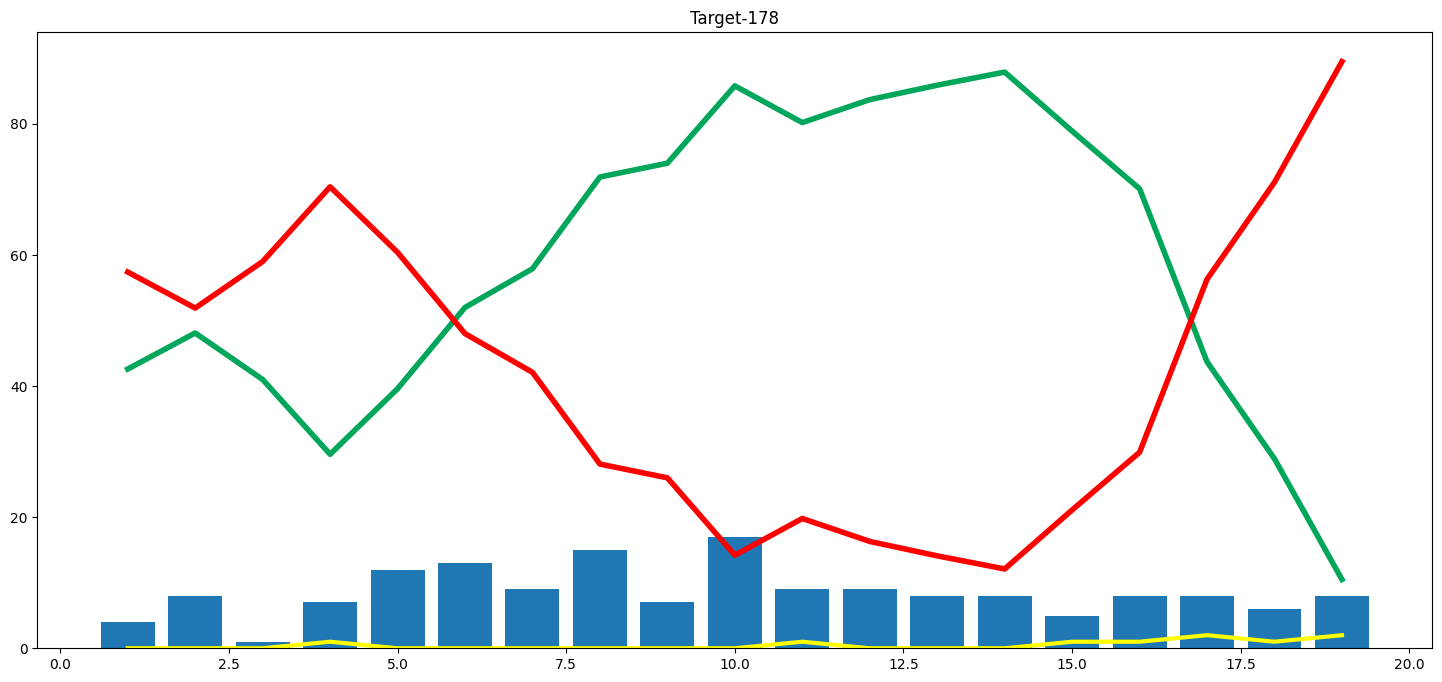

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [68]:
import pickle
pickle.dump(pipe,open('pipe4.pkl','wb'))